
**1. Target Problem**

The problem is a multi-class classification problem with an objective to predict which type each laptop in dataset belongs to. (The target variable "TypeName") based on its design specifications defined in the dataset.in order to address this proplem we used Naive bayes classifier to predict type of each observation in dataset.
The dataset we used contains 1303 observations which need to assigne to one of 6 classes (2 in 1 Convertible, Gaming, Netbook, Notebook, Ultrabook,or Workstation)

Choosen dataset is "Laptops Price" dataset fom kaggle "https://www.kaggle.com/muhammetvarl/laptop-price".

**Laptops dataset**

The dataset consists of several variables.There is a total of 1303 observations and 13 variables. The variables in the dataset are:
1. Company- String - Represent Laptop Manufacturer
2. Product -String -Represent Brand and Model
3. TypeName -String -Represent the Type (Notebook, Ultrabook, Gaming, etc.)
4. Inches -Numeric- Represent Screen Size
5. ScreenResolution -String- Represent Screen Resolution
6. Cpu- String - Represent type of Central Processing Unit (CPU)
7. Ram -String- Laptop RAM size.
8. Memory -String- Hard Disk / SSD Memory
9. GPU -String- Graphics Processing Units (GPU)
10. OpSys -String- the Operating System
11. Weight -String- Laptop Weight
12. Price_euros -Numeric- Price (Euro)
13. x-Numeric- represent ID


In [ ]:
# first:Set the working directory
setwd("path")
# second: Read the data file
laptops <-read.csv('laptops.csv')
# Get an overall statistical summary of the dataset
summary(laptops)

       X             Company                  Product    
 Min.   :   1.0   Dell   :297   XPS 13            :  30  
 1st Qu.: 331.5   Lenovo :297   Inspiron 3567     :  29  
 Median : 659.0   HP     :274   250 G6            :  21  
 Mean   : 660.2   Asus   :158   Legion Y520-15IKBN:  19  
 3rd Qu.: 990.5   Acer   :103   Vostro 3568       :  19  
 Max.   :1320.0   MSI    : 54   Inspiron 5570     :  18  
                  (Other):120   (Other)           :1167  
               TypeName       Inches     
 2 in 1 Convertible:121   Min.   :10.10  
 Gaming            :205   1st Qu.:14.00  
 Netbook           : 25   Median :15.60  
 Notebook          :727   Mean   :15.02  
 Ultrabook         :196   3rd Qu.:15.60  
 Workstation       : 29   Max.   :18.40  
                                         
                                  ScreenResolution
 Full HD 1920x1080                        :507    
 1366x768                                 :281    
 IPS Panel Full HD 1920x1080              :230 

**2. Dataset Explanation and Exploration**



In [ ]:
## look at the first 6 lines of the dataset
head(laptops)

X,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69
2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00
4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45
5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60
6,Acer,Aspire 3,Notebook,15.6,1366x768,AMD A9-Series 9420 3GHz,4GB,500GB HDD,AMD Radeon R5,Windows 10,2.1kg,400.00


In [ ]:
#Studying the structure of the data
str(laptops)
#dimensionality of dataset
dim(data)

'data.frame':	1303 obs. of  13 variables:
 $ X               : int  1 2 3 4 5 6 7 8 9 10 ...
 $ Company         : Factor w/ 19 levels "Acer","Apple",..: 2 2 8 2 2 1 2 2 3 1 ...
 $ Product         : Factor w/ 618 levels "110-15ACL (A6-7310/4GB/500GB/W10)",..: 302 300 51 302 302 59 302 300 615 431 ...
 $ TypeName        : Factor w/ 6 levels "2 in 1 Convertible",..: 5 5 4 5 5 4 5 5 5 5 ...
 $ Inches          : num  13.3 13.3 15.6 15.4 13.3 15.6 15.4 13.3 14 14 ...
 $ ScreenResolution: Factor w/ 40 levels "1366x768","1440x900",..: 24 2 9 26 24 1 26 2 9 16 ...
 $ Cpu             : Factor w/ 118 levels "AMD A10-Series 9600P 2.4GHz",..: 55 53 64 75 57 15 74 53 96 73 ...
 $ Ram             : Factor w/ 9 levels "12GB","16GB",..: 9 9 9 2 9 6 2 9 2 9 ...
 $ Memory          : Factor w/ 39 levels "1.0TB HDD","1.0TB Hybrid",..: 5 3 17 30 17 27 16 16 30 17 ...
 $ Gpu             : Factor w/ 110 levels "AMD FirePro W4190M",..: 59 52 54 10 60 18 61 52 98 62 ...
 $ OpSys           : Factor w/ 9 levels "

[1] 1303   13

In [ ]:
# Display the summary of 'TypeName' variable (target variable)
summary(laptops$TypeName)

2 in 1 Convertible             Gaming            Netbook           Notebook 
               121                205                 25                727 
         Ultrabook        Workstation 
               196                 29

In [ ]:
# To make sure the data is clean
# count the 0's values in each column and row separately
list( Column = colSums(data==0),
        Row = sum(rowSums(data==0)) )
#count NA values
sum(is.na(data))

$Column
               X          Company          Product         TypeName 
               0                0                0                0 
          Inches ScreenResolution              Cpu              Ram 
               0                0                0                0 
          Memory              Gpu            OpSys           Weight 
               0                0                0                0 
     Price_euros 
               0 

$Row
[1] 0

[1] 0

There are no missing values, so the dataset considered clean and ready to deal with.

In [ ]:
# Delete anwanted column(X)
laptops<- laptops[ , -1]
dim(laptops)

[1] 1303   12

###  Visualisation
take a look at some significant variables.
#### Bar chart


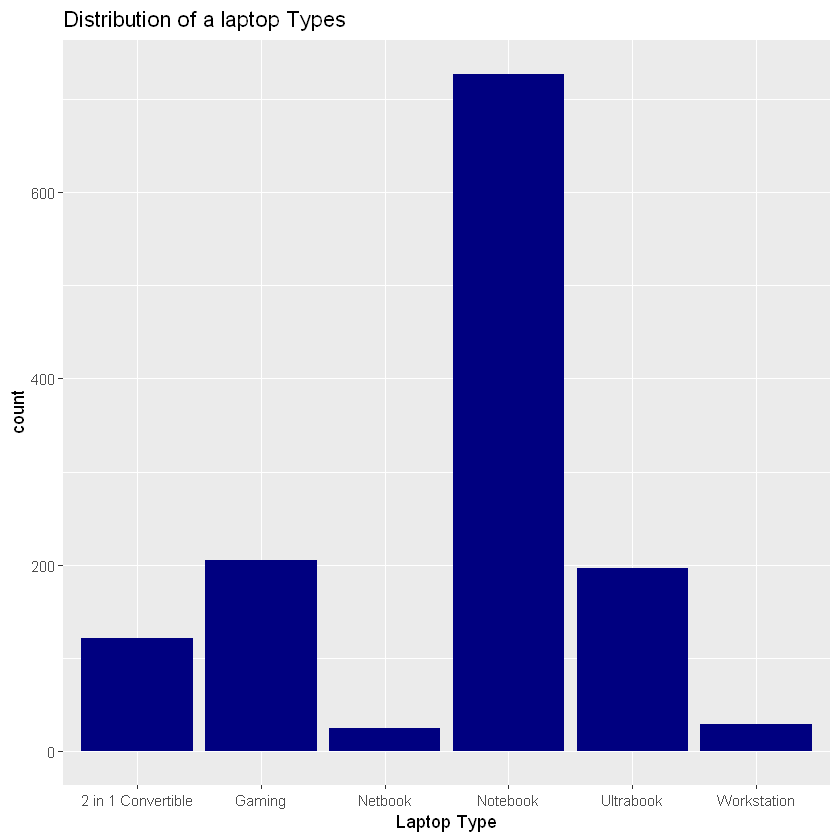

In [ ]:
#Bar chart for "TypeName" variable
ggplot(laptops,aes(x= TypeName)) +
geom_bar(fill='Navy')+
#determine the title
ggtitle("Distribution of a laptop Types ") + xlab("Laptop Type")

The height of the bars displays how many observations occurred with each Type.

#### Stacked bar chart


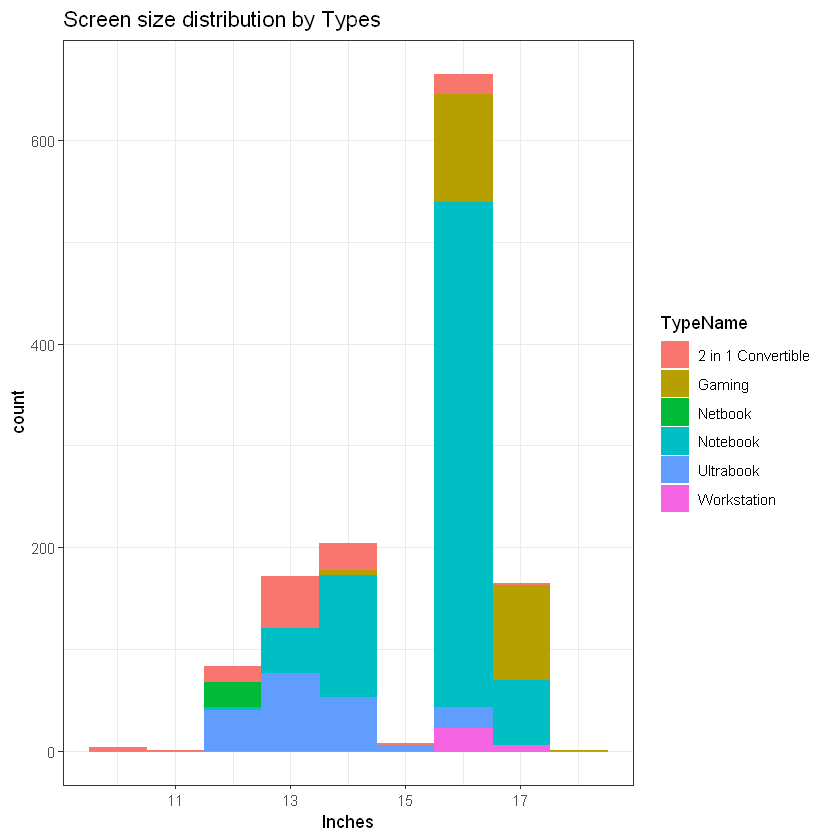

In [ ]:
c <- ggplot(data, aes(x=Inches, fill=TypeName, color=TypeName)) +
geom_histogram(binwidth = 1) + labs(title="Screen size distribution by Types")
c + theme_bw()

From the chart, we can see that,the distribution  of types in each screen size .

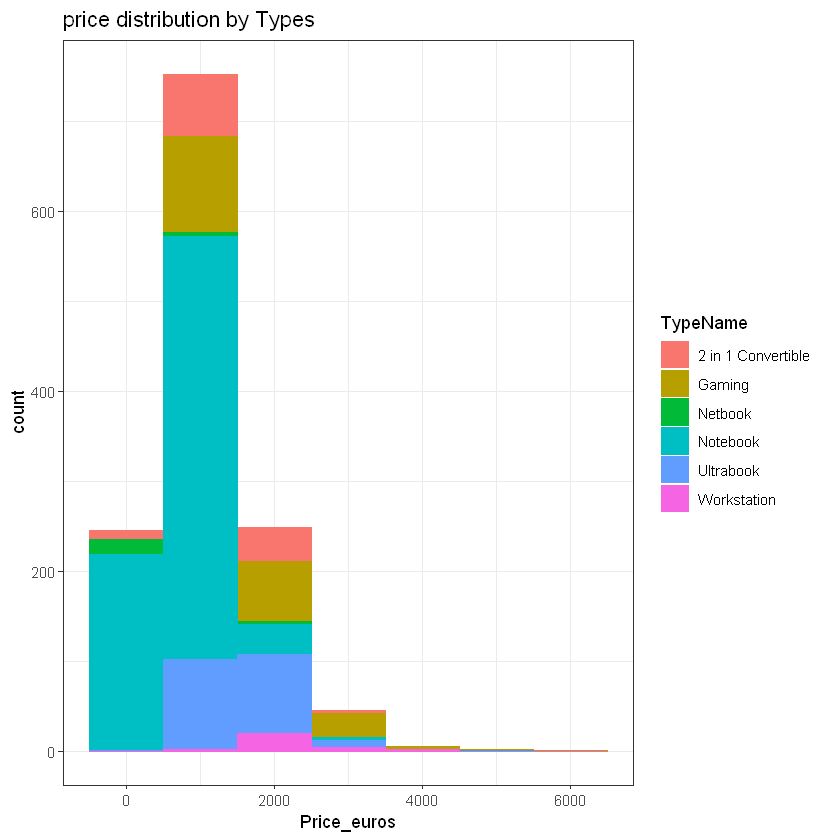

In [ ]:
c <- ggplot(data, aes(x=Price_euros, fill=TypeName, color=TypeName)) +
geom_histogram(binwidth = 1000) + labs(title="price distribution by Types")
c + theme_bw()

From the chart, we can see that, the types distribution based on laptop price  .

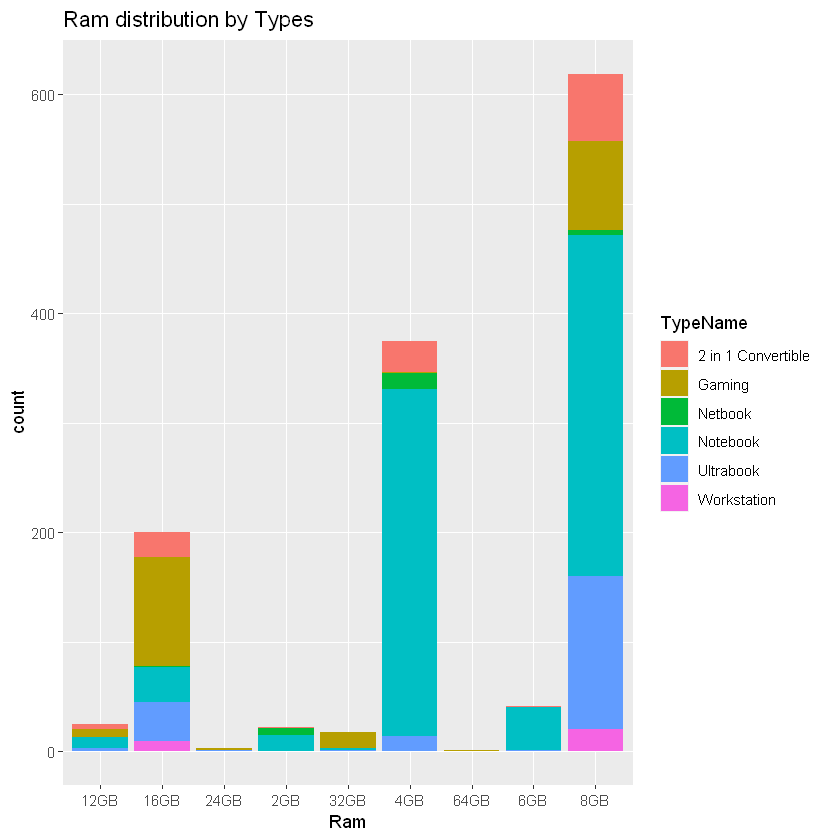

In [ ]:
ggplot(laptops, aes(x = Ram, fill = TypeName)) +
  geom_bar(position = "stack")+ labs(title="Ram distribution by Types")

From the chart, we can see that, the types distribution for each Ram type.

### Segmented bar chart

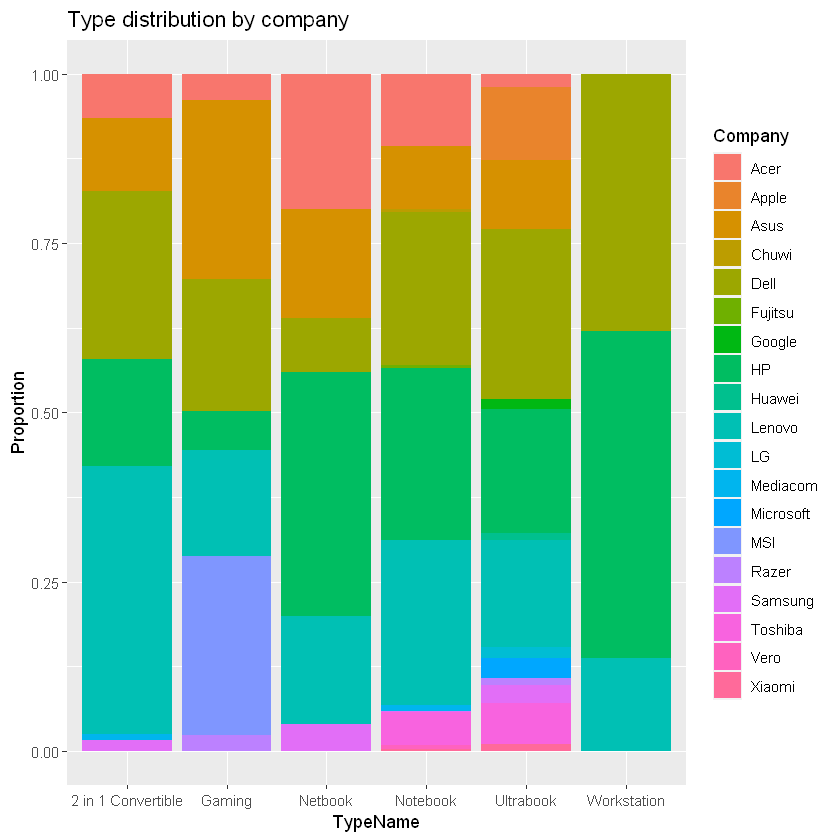

In [ ]:
# bar plot, with each bar representing 100%
ggplot(laptops, aes(x = TypeName, fill = Company)) +
  geom_bar(position = "fill") +
  labs(y = "Proportion")+ labs(title="Type distribution by company")

From the chart, we can see that, the companies distribution for each type.

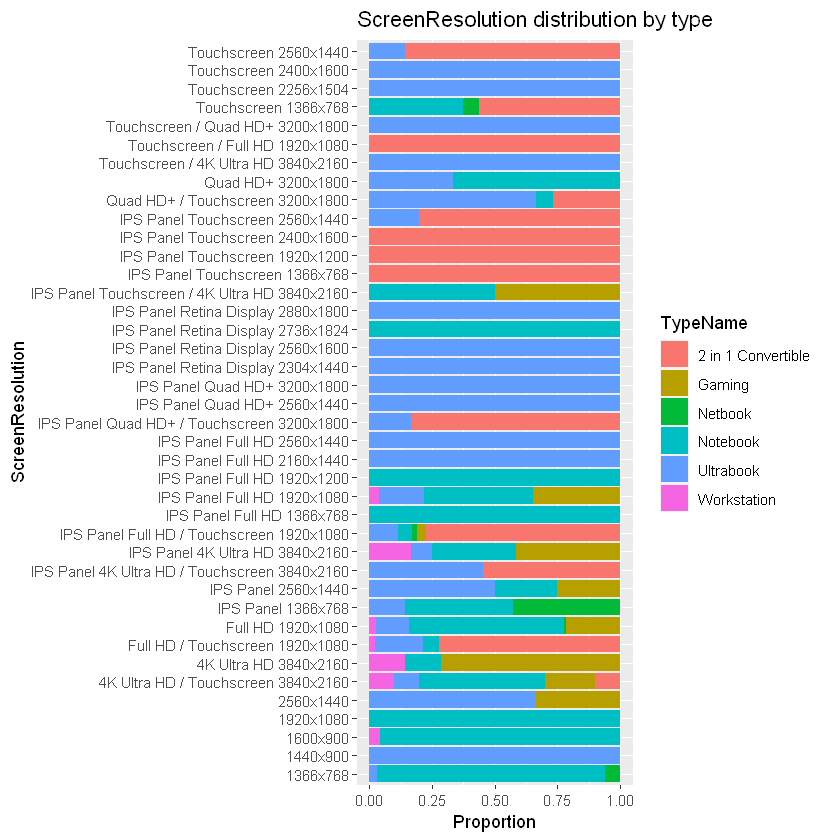

In [ ]:
# bar plot, with each bar representing 100%
ggplot(laptops, aes(x = ScreenResolution, fill = TypeName)) +
  geom_bar(position = "fill") +
  labs(y = "Proportion")+ labs(title="ScreenResolution distribution by type")+ coord_flip()

From the chart, we can see that, the types distribution for each ScreenResolution type.

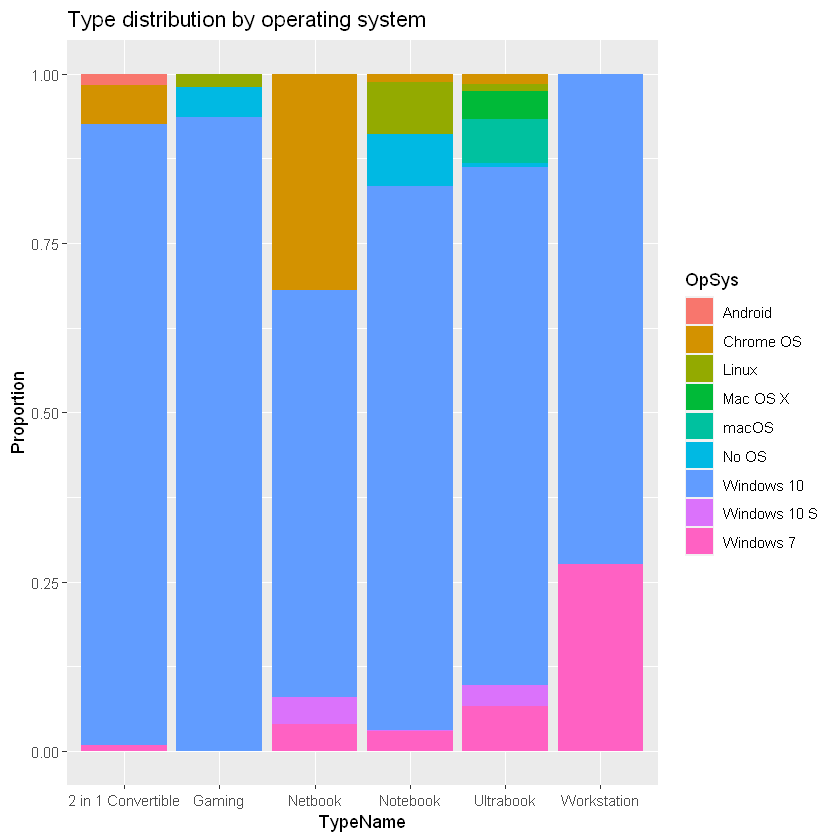

In [ ]:
# bar plot, with each bar representing 100%
ggplot(laptops, aes(x = TypeName, fill = OpSys)) +
  geom_bar(position = "fill") +
  labs(y = "Proportion")+ labs(title="Type distribution by operating system")

From the chart, we can see that, the operating systems distribution for each type.

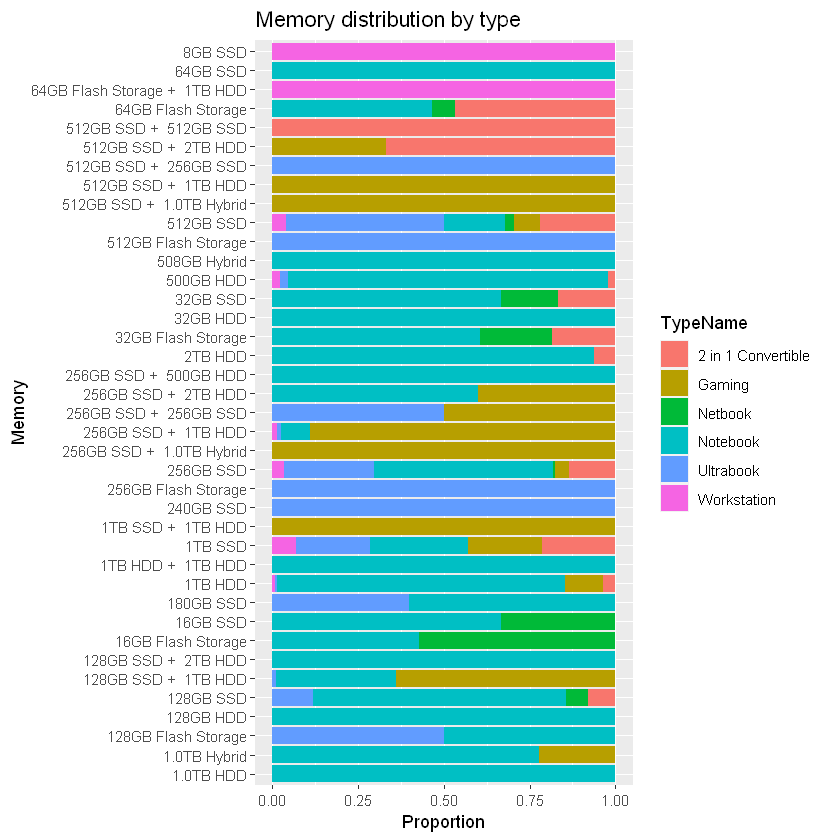

In [ ]:
# bar plot, with each bar representing 100%
ggplot(laptops, aes(x = Memory, fill = TypeName)) +
  geom_bar(position = "fill") +
  labs(y = "Proportion")+ labs(title="Memory distribution by type")+ coord_flip()


From the chart, we can see that, the types distribution for each Memory type.

#### Using Scatter Plot
 Plotting price as a function of Type in order to visualise the relationship between the two variables.

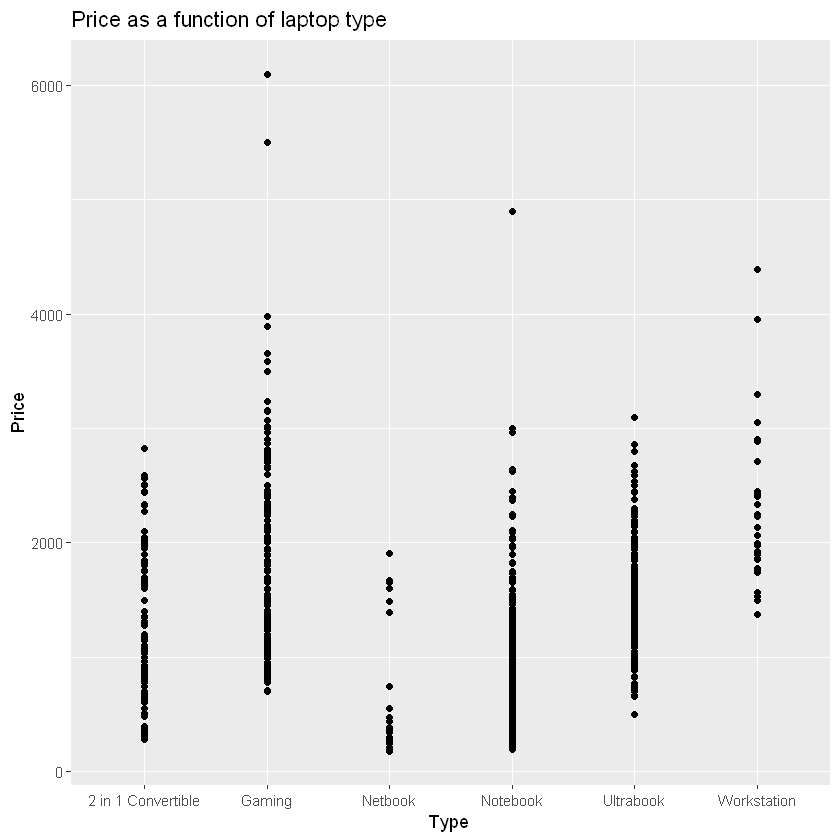

In [ ]:
#plot
ggplot(laptops, aes(x=TypeName,y=Price_euros)) +
geom_point() +
# determine the title
ggtitle("Price as a function of laptop type")+ xlab("Type ")+ ylab("Price")

**3. Choosen machine learning model**

The problem is a multi-class classification problem. So, based on that Choosen model is a naive bayes classification model.
The naive Bayes classifier is not sensitive to irrelevant features and assumes that the value of a particular feature (target) is independent of the value of other features, given the class variable.

Using naive bayes classifier the model will predict each Type of laptops(TypeName) based on other variables like price, CPU, Screen size, OS, etc..


**4. Experimental Settings:**

Before we make the model, we need to split the data into train dataset and test dataset. We will use the train dataset to train the model. And the test dataset will be used as a comparasion and see if the model get overfit and can not predict new data that hasn’t been seen during training phase. We will use 80% of the data as the training data and the rest of it as the testing data.


In [ ]:
#Split the dataset into training and test that 80:20 percent split

NBmodel<- laptops
set.seed(111)
 NBmodel$Random<- runif(nrow(NBmodel))

datatrain<- subset(NBmodel, NBmodel$Random>=0.2)
datatest <- subset(NBmodel, NBmodel$Random<0.2)

#Display the number of rows in the each dataset
nrow(datatrain)
nrow(datatest)


[1] 1052

[1] 251

**4.1 Fitting  the Naive Bayes model**



In [ ]:
# install packages
install.packages('e1071')
# load the library 'e1071' to access the naive bayes classification function
library(e1071)

In [ ]:
#Build the model formula

#First, select the variables that create the model formula
lapVar<-setdiff(colnames(NBmodel),list('TypeName','Random'))

# create formula
formula <- as.formula(paste('TypeName',paste(lapVar, collapse = ' + '), sep='~'))


In [ ]:
# Fit the model using the function naiveBayes()
laptopModel <-naiveBayes(formula, data=datatrain)

In [ ]:
# Apply the model prediction using the function predict()
datatest$predict <- predict(laptopModel, newdata=datatest, type="class")
datatrain$predict <- predict(laptopModel, newdata=datatrain, type="class")

**4.2 Evaluating the model**



In [ ]:
# look at a sample of the results
sample <- datatest[c(3,56,11,6,22,14,6), c('TypeName','predict')]
sample

,TypeName,predict
13,Ultrabook,Ultrabook
270,Notebook,Notebook
61,Notebook,Notebook
17,Notebook,Notebook
106,Notebook,Notebook
69,Notebook,Notebook
17.1,Notebook,Notebook


**Multi-Class Confusion Matrix**

The confusion matrix provides a tabular summary of the actual class labels vs. the predicted ones. The test set we are evaluating contains 251 observation which are assigned to one of 6 classes (2 in 1 Convertible, Gaming, Netbook,, Notebook Ultrabook,Workstation)

In [ ]:
# Multi-Class Confusion Matrix
confMatrix<-table(Truth=datatest$TypeName ,prediction=datatest$predict )
confMatrix

                    prediction
Truth                2 in 1 Convertible Gaming Netbook Notebook Ultrabook
  2 in 1 Convertible                 18      0       1        0         6
  Gaming                              0     40       0        2         0
  Netbook                             0      0       5        0         2
  Notebook                            2      4       0      126         4
  Ultrabook                           0      0       0        4        31
  Workstation                         0      1       0        0         0
                    prediction
Truth                Workstation
  2 in 1 Convertible           0
  Gaming                       0
  Netbook                      0
  Notebook                     0
  Ultrabook                    0
  Workstation                  5

In [ ]:
# Next, Define some basic variables that will be needed to compute the evaluation metrics.
 n = sum(confMatrix) # number of observations
 nc = nrow(confMatrix) # number of classes
 diag = diag(confMatrix) # number of correctly classified observations per class
 rowsums = apply(confMatrix, 1, sum) # number of observations per class
 colsums = apply(confMatrix, 2, sum) # number of predictions per class
 p = rowsums / n # distribution of observations over the actual classes
 q = colsums / n # distribution of observations over the predicted classes

**1. Accuracy**

A key metric: is the overall classification accuracy. It is defined as the fraction of observations that are correctly classified.

In [ ]:
accuracy = sum(diag) / n
accuracy

[1] 0.8964143

**2. Precision, Recall, and F-1 Per class :**

In order to assess the performance with respect to every class in the dataset, we will compute precision, recall, and the F-1 score. These metrics are particularly useful when the class labels are not uniformly distributed. Precision is defined as the fraction of correct predictions for a certain class, whereas recall is the fraction of observations of a class that were correctly predicted.and the F-1 score is defined as the weighted average of precision and recall.

In [ ]:
precision = diag / colsums
recall = diag / rowsums
f1 = 2 * precision * recall / (precision + recall)
#Show it as a data frame
data.frame(precision, recall, f1)

,precision,recall,f1
2 in 1 Convertible,0.9000000,0.7200000,0.8000000
Gaming,0.8888889,0.9523810,0.9195402
Netbook,0.8333333,0.7142857,0.7692308
Notebook,0.9545455,0.9264706,0.9402985
Ultrabook,0.7209302,0.8857143,0.7948718
Workstation,1.0000000,0.8333333,0.9090909


**3. Macro-averaged Metrics**

The per-class metrics can be averaged over all the classes resulting in macro-averaged precision, recall and F-1.

In [ ]:
macroPrecision = mean(precision)
macroRecall = mean(recall)
macroF1 = mean(f1)
#show it as a data frame
data.frame(macroPrecision, macroRecall, macroF1)

macroPrecision,macroRecall,macroF1
0.8829497,0.8386975,0.8555054


**4. One-vs-all**
a function to compute matrix for each class.
it is useful to look at the performance of the classifier with respect to one class at a time before averaging the metrics. we will compute the one-vs-all confusion matrix for each class. we can think of the problem as 6 binary classification tasks where one class is considered the positive class while the combination of all the other classes make up the negative class.

In [ ]:
oneVsAll = lapply(1 : nc,
                      function(i){
                        v = c(confMatrix[i,i],
                              rowsums[i] - confMatrix[i,i],
                              colsums[i] - confMatrix[i,i],
                              n-rowsums[i] - colsums[i] + confMatrix[i,i]);
                        return(matrix(v, nrow = 2, byrow = T))})
oneVsAll

18,7
2,224
40,2
5,204
5,2
1,243
126,10
6,109
31,4
12,204
5,1


Summing up the values of these 6 matrices results in one confusion matrix and allows us to compute micro-averaged metrics.

In [ ]:
#pooled matrix
pooled= matrix(0, nrow = 2, ncol = 2)
 for(i in 1 : nc)
 {pooled = pooled+ oneVsAll[[i]]}
 pooled

225,26
26,1229


**5. Micro-averaged**


In [ ]:
 micro_avrg = (diag(pooled) / apply(pooled,1, sum))[1];
 micro_avrg

[1] 0.8964143

### The conclusion:


In [ ]:
# show all Performance Measures
data.frame(precision, recall, f1)
data.frame(accuracy,macroPrecision, macroRecall, macroF1,micro_avrg)

,precision,recall,f1
2 in 1 Convertible,0.9000000,0.7200000,0.8000000
Gaming,0.8888889,0.9523810,0.9195402
Netbook,0.8333333,0.7142857,0.7692308
Notebook,0.9545455,0.9264706,0.9402985
Ultrabook,0.7209302,0.8857143,0.7948718
Workstation,1.0000000,0.8333333,0.9090909


accuracy,macroPrecision,macroRecall,macroF1,micro_avrg
0.8964143,0.8829497,0.8386975,0.8555054,0.8964143


**Accuracy** is the most intuitive performance measure and it is simply a ratio of correctly predicted observation to the total observations. For our model, we have got 0.8964143 which means our model is approx. 89% accurate.

Accuracy is a great measure but we have to look at other parameters to evaluate the performance of the model.

**Precision** Precision is the ratio of correctly predicted positive observations to the total predicted positive observations.
High precision relates to the low false positive rate for each class.

We have got:
- 2 in 1 Convertible 0.900 precision which is pretty good.
- Gaming	0.8888889 which is pretty good.
- Netbook	0.8333333 which is pretty good.
- Notebook	0.9618321 which is pretty good.
- Ultrabook	0.7272727 which is pretty good.
- Workstation	1.0000000 which is perfect.

**Recall (Sensitivity)** Recall is the ratio of correctly predicted positive observations to the all observations in actual class for each class.
We have got:
- 2 in 1 Convertible 0.7200000 .
- Gaming	0.9523810 .
- Netbook	0.7142857 .
- Notebook	0.9264706 .
- Ultrabook	0.9142857 .
- Workstation	0.8333333.

which is  all good for this model as it’s above 0.5.

**F1 score**  is the weighted average of Precision and Recall for each class.
In our case, F1 score is :
- 2 in 1 Convertible	0.8000000
- Gaming	0.9195402
- Netbook	0.7692308
- Notebook	0.9438202
- Ultrabook	0.8101266
- Workstation	0.9090909

**macroaveraging**  we compute the performance for each class, and then average over classes.
- macroPrecision	0.8852212
- macroRecall	0.8434594
- macroF1  0.8586348

**microaveraging** we collect all classes into a single confusion matrix, and then compute precision from that matrix.
- micro_avrg  0.8964143	.

Finally, based on these performance Measures we consider the model is perform well to predict classes or types for the laptops.